# Classical Machine learning for logical gates

## Dataset 1

In [1]:
# get pandas running
import numpy as np
import pandas as pd

In [2]:
#read in dataset
df1 = pd.read_excel("../kaggle/fuzzy/AND Fuzzy.xlsx")
df1.head()

,Unnamed: 0,X1,X2,Target
0,0,0.840287,0.330545,0
1,1,0.410047,0.225367,0
2,2,0.300130,0.769993,0
3,3,0.653653,0.274764,0
4,4,0.568839,0.256385,0


In [3]:
print(df1.shape)

(1000, 4)


In [4]:
print(df1.columns)

Index(['Unnamed: 0', 'X1', 'X2', 'Target'], dtype='object')


In [5]:
df1.describe()

,Unnamed: 0,X1,X2,Target
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.482618,0.486176,0.250000
std,288.819436,0.299070,0.297332,0.433229
min,0.000000,0.000062,0.000724,0.000000
25%,249.750000,0.217795,0.227072,0.000000
50%,499.500000,0.501475,0.499011,0.000000
75%,749.250000,0.747167,0.737384,0.250000
max,999.000000,0.997071,0.999507,1.000000


# here we see that our data for A and B is from -1 to 5 (3)

## Dataset 2

In [6]:
# get pandas running
import numpy as np
import pandas as pd

#read in dataset
df2 = pd.read_excel("../kaggle/fuzzy/XOR Fuzzy.xlsx")
df2.head()

print(df2.shape)
print(df2.columns)
description = df2.describe()

(1000, 4)
Index(['Unnamed: 0', 'X1', 'X2', 'Target'], dtype='object')


# Try with regression

## imports

In [7]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # Datensplits
from sklearn.linear_model import LinearRegression # Machine learning
from sklearn import metrics # Model evaluation

## prepare data

In [8]:
# drop not needed columns
df2.drop(columns=df2.columns[0], axis=1, inplace=True)
print(df2.columns)
description = df2.describe()
print(description)

# split in train and test data
df_train, df_test = np.split(df2, [int(len(df2)*0.7)])

# see if train and test data are quite the same
print(df_train.describe())
print(df_test.describe())

Index(['X1', 'X2', 'Target'], dtype='object')
                X1           X2      Target
count  1000.000000  1000.000000  1000.00000
mean      0.488224     0.493889     0.50000
std       0.290966     0.296587     0.50025
min       0.000067     0.000428     0.00000
25%       0.230494     0.229903     0.00000
50%       0.495980     0.499074     0.50000
75%       0.745465     0.752604     1.00000
max       0.997674     0.998858     1.00000
               X1          X2      Target
count  700.000000  700.000000  700.000000
mean     0.479748    0.507664    0.502857
std      0.294930    0.296724    0.500349
min      0.000067    0.000428    0.000000
25%      0.210721    0.239447    0.000000
50%      0.481823    0.521934    1.000000
75%      0.740105    0.773955    1.000000
max      0.997674    0.998858    1.000000
               X1          X2      Target
count  300.000000  300.000000  300.000000
mean     0.508001    0.461747    0.493333
std      0.280987    0.294257    0.500791
min      0.0

In [9]:
# split in input X and output y
def get_features_and_targets(df):
    X = df.drop(["Target"], axis=1).values
    y = np.stack(df["Target"])
    return X, y

X_train, y_train = get_features_and_targets(df_train)
X_test, y_test = get_features_and_targets(df_test)

print(X_train)
print(y_train)

print(X_test)
print(y_test)

[[0.59140793 0.61561936]
 [0.1318304  0.34636674]
 [0.17758343 0.8405715 ]
 ...
 [0.99342062 0.24940961]
 [0.69330392 0.30243006]
 [0.00534434 0.93836599]]
[0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1
 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1
 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0
 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1
 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0
 1 0 0 0 1 0 0 0 0 

## train KI (regression)

In [10]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

## results

In [11]:
# try with test data
predictions = clf.predict(X_test)

print("Prediction\t|True Value")
print("-"*30)
for idx, (pred, annotation) in enumerate(zip(predictions, y_test)):
    if idx == 10:
        break
    pred = int(pred)
    annotation = int(annotation)
    print(f"{pred}\t\t|{annotation}")
    
mae = metrics.mean_absolute_error(y_test, predictions)
mae_ratio = metrics.mean_absolute_percentage_error(y_test, predictions)
r2_score = metrics.r2_score(y_test, predictions) 
score = clf.score(X_test, y_test)

print(f"Average error (mae): {np.round(mae)};")
print(f"Average error ration: {np.round(mae_ratio * 100)}%;")
print(f"The R^2 value is: {np.round(r2_score * 100)}%")
print(f"The score value is: {score}")
print(f"The R^2 value is between 0 and 100% -> it's better than mean of data (0%) but not nearly perfect (100%))")
print(f"Maybe take a more sofisticated model -> CNN?!?")

Prediction	|True Value
------------------------------
0		|0
0		|0
0		|0
0		|1
0		|1
0		|1
0		|1
0		|0
0		|1
0		|1
Average error (mae): 1.0;
Average error ration: 1.1469072941339333e+17%;
The R^2 value is: -1.0%
The score value is: -0.0074925556379725755
The R^2 value is between 0 and 100% -> it's better than mean of data (0%) but not nearly perfect (100%))
Maybe take a more sofisticated model -> CNN?!?


In [12]:
# test data
df_test.iloc[0]
X_test[0]
# single prediction
single_pred = clf.predict([X_test[0]])[0]
print(f"Prediction is: {single_pred}.")
print(f"Real value is: {y_test[0]}.")

Prediction is: 0.5467857698033587.
Real value is: 0.


In [13]:
print(predictions)

[0.54678577 0.52852238 0.51721073 0.51778787 0.50462391 0.47333652
 0.50071772 0.46235496 0.53811719 0.54524608 0.46671982 0.53583342
 0.5021771  0.50575046 0.45640955 0.4791727  0.45495349 0.53342279
 0.52173148 0.4676761  0.51363443 0.47051042 0.53771736 0.53973225
 0.4338869  0.4435762  0.52594032 0.49148426 0.49728743 0.52289974
 0.46892668 0.5273057  0.50182666 0.44510951 0.5370811  0.50669103
 0.48295393 0.53960142 0.52278983 0.52743663 0.46771299 0.50652349
 0.52443658 0.50063365 0.4994141  0.44701751 0.46599099 0.54179125
 0.47449852 0.53016883 0.45743809 0.53765151 0.51968094 0.5367043
 0.52573911 0.51403165 0.51340616 0.50773906 0.4487565  0.46873427
 0.47172839 0.50984984 0.5523398  0.49831859 0.49299407 0.51311728
 0.43876844 0.44626138 0.50380889 0.50987574 0.54434246 0.47218452
 0.52756058 0.47817576 0.50161436 0.55353697 0.50738173 0.44333535
 0.45064909 0.47755292 0.54254073 0.50241477 0.55448968 0.49172491
 0.53249542 0.51191883 0.49848546 0.52222378 0.52432404 0.46361

## train ki (CNN)

In [14]:
# some imports
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import RMSprop

2024-02-02 09:58:31.768440: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 09:58:31.813594: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 09:58:31.813625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 09:58:31.815093: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 09:58:31.821876: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 09:58:31.822756: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [15]:
# create the CNN
#input1 = Input(shape=(2,))
#x = Dense(2)(input1)
#x = Dense(1)(x)
#model = Model(inputs=[input1], outputs=x)
#model.summary()

model = Sequential()
model.add(Dense(12, input_shape=(2,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                36        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 149 (596.00 Byte)
Trainable params: 149 (596.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(
    optimizer = RMSprop(learning_rate=0.02,rho=0.9, epsilon=None,decay=0),
    loss = 'mean_squared_error', metrics=['accuracy']
)

In [17]:
epochs=100

history = model.fit(X_train, y_train, epochs=epochs, shuffle=1, validation_data=(X_test, y_test),)

Epoch 1/100
22/22 [==============================] - 1s 13ms/step - loss: 0.2284 - accuracy: 0.6671 - val_loss: 0.2088 - val_accuracy: 0.7200
Epoch 2/100
22/22 [==============================] - 0s 6ms/step - loss: 0.1590 - accuracy: 0.8429 - val_loss: 0.1346 - val_accuracy: 0.8533
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 0.1075 - accuracy: 0.8857 - val_loss: 0.0999 - val_accuracy: 0.8767
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0922 - accuracy: 0.8729 - val_loss: 0.0928 - val_accuracy: 0.8900
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0801 - accuracy: 0.9000 - val_loss: 0.1073 - val_accuracy: 0.8600
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0747 - accuracy: 0.9014 - val_loss: 0.0779 - val_accuracy: 0.8800
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0666 - accuracy: 0.9114 - val_loss: 0.0680 - val_accuracy: 0.9067
Epoch 8/100


Epoch 59/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0076 - accuracy: 0.9929 - val_loss: 0.0064 - val_accuracy: 0.9933
Epoch 60/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0089 - accuracy: 0.9886 - val_loss: 0.0079 - val_accuracy: 0.9867
Epoch 61/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0103 - accuracy: 0.9871 - val_loss: 0.0079 - val_accuracy: 0.9867
Epoch 62/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.9900 - val_loss: 0.0068 - val_accuracy: 0.9900
Epoch 63/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0092 - accuracy: 0.9914 - val_loss: 0.0128 - val_accuracy: 0.9800
Epoch 64/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.9886 - val_loss: 0.0252 - val_accuracy: 0.9633
Epoch 65/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 0.9857 - val_loss: 0.0054 - val_accuracy: 0.9933
Epoch 

In [18]:
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

10/10 - 0s - loss: 0.0089 - accuracy: 0.9900 - 42ms/epoch - 4ms/step
Test loss: 0.008892396464943886
Test accuracy: 0.9900000095367432


## results

In [19]:
def show_accuracy_loss_plot(history, num_epochs):
    epochs = [i for i in range(num_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(16,9)
    
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Train Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Test Accuracy')
    ax[0].set_title('Training & Test Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    
    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
    ax[1].set_title('Training & Test Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    plt.show()

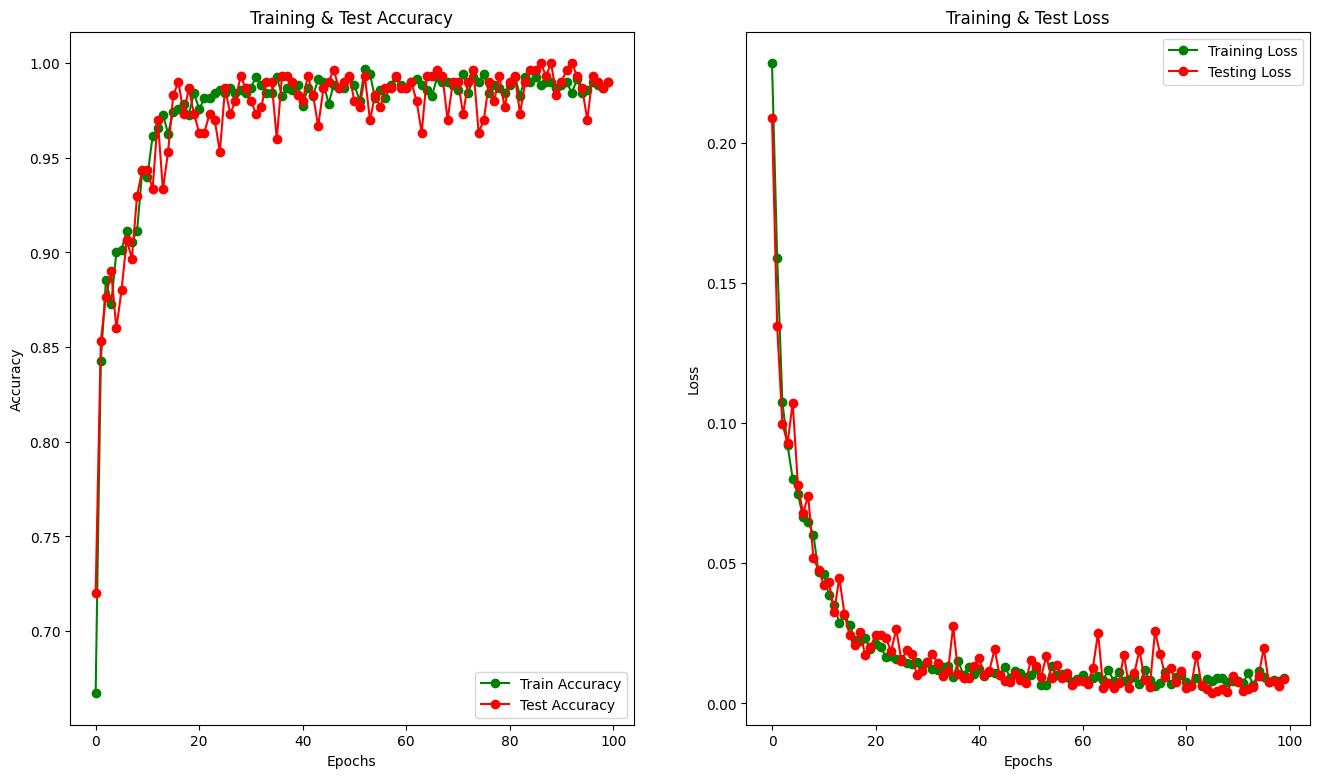

In [20]:
show_accuracy_loss_plot(history, epochs)

Our accuracy is around 93%
Should we adapt the model to get is more accurate?

10/10 [==============================] - 0s 2ms/step


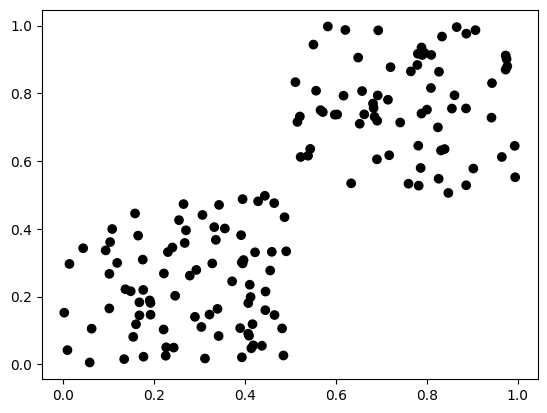

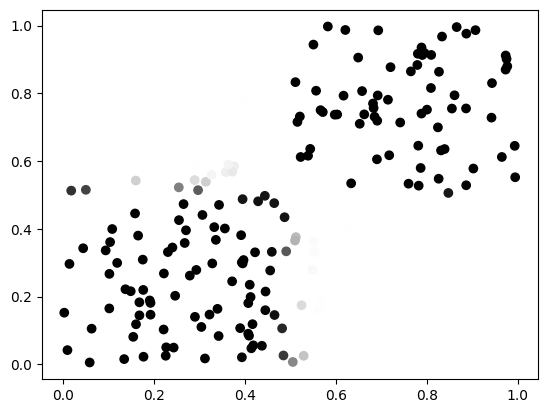

In [21]:
#plot test points and predictions
predictions = model.predict(X_test)
predictions_rounded = [round(x[0]) for x in predictions]
x_axis = X_test[:,0]
y_axis = X_test[:,1]
plt.scatter(x_axis, y_axis, c=y_test, cmap='gray')
plt.show()
plt.scatter(x_axis, y_axis, c=predictions, cmap='gray')
plt.show()

In [22]:
#print(predictions)
#print(y_test)

## Recall and F1-Score

In [23]:
from sklearn.metrics import f1_score

f1_score(y_test, predictions_rounded, average='micro')

0.99

F1 score	Interpretation
> 0.9	Very good
0.8 - 0.9	Good
0.5 - 0.8	OK
< 0.5	Not good

In [24]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions_rounded, average='micro')

0.99

In [25]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions_rounded, average='micro')

(0.99, 0.99, 0.99, None)

## Confusion matrix

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

cm = confusion_matrix(y_test,predictions_rounded)

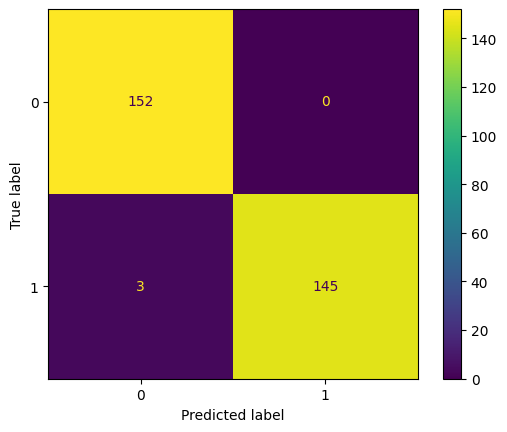

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()